# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [3]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [4]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.379036385555
rmse median 0.462275494579


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [6]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.128332443345
mean error unbiased 0.0169454827639


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [7]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

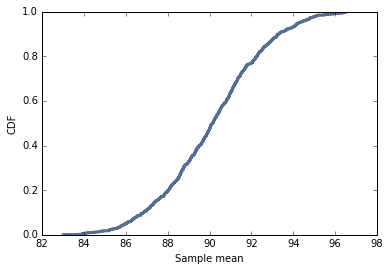

In [8]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [9]:
np.mean(xbars)

90.118485708260351

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [10]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.962383943902125, 94.259732872087156)

And the RMSE of the sample means is called the standard error.

In [11]:
stderr = RMSE(xbars, 90)
stderr

2.4803025804438752

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [12]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.1992348874
rmse Lm 1.85822592603
mean error L 0.412697109295
mean error Lm 0.531409677364


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [13]:
bars = []
medians = []
for i in range(10000):
    vals = [random.gauss(0,1) for i in range(7)]
    bars.append(np.mean(vals))
    medians.append(np.median(vals))

print("mean error for xbar: \t %f" % MeanError(bars, 0))
print("mean error for median: \t %f" % MeanError(medians, 0))


mean error for xbar: 	 0.000246
mean error for median: 	 0.002158


In [18]:
mu = 0
sigma = 1
estimates1 = []
estimates2 = []

for i in range(10000): # from Estimate2
    xs = [random.gauss(mu, sigma) for i in range(7)]
    biased = np.var(xs)
    unbiased = np.var(xs, ddof=1)
    estimates1.append(biased)
    estimates2.append(unbiased)

print("root mean error S^2: \t\t %f" % RMSE(estimates1, 1))
print("root mean error S^2_n-1: \t %f" % RMSE(estimates2, 1))



root mean error S^2: 		 0.512942
root mean error S^2_n-1: 	 0.573808


It appears that the median has a slightly higher mean error - but, still quite small given the mean and standard deviation; both mean and median appear unbiased, since their mean errors are near zero and change in sign on repeated iterations.

For the S^2 and S^2_n-1, the RMSE of S^2_n-1 appears higher than that of S^2 - slightly, but consistently and noticeably, suggesting that the unbiased option actually has a higher MSE.

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [25]:
def exponential_sample(size=10, iters=1000, k=2):
    # k is the lambda value, since lambda is a reserved keyword
    
    lvals = [1.0/np.mean(np.random.exponential(1.0/k, size)) for _ in range(iters)] # k or 1/k?

    print("Mean: ", np.mean(lvals))
    
    print("RMSE: %f" % RMSE(lvals, k))
    
    cdf = thinkstats2.Cdf(lvals)
    
    print("Confidence interval: ", (cdf.Percentile(5), cdf.Percentile(95)))
    

exponential_sample()
    

Mean:  2.16705782011
RMSE: 0.770335
Confidence interval:  (1.2511504776377893, 3.5944488927715508)


In [28]:
for i in range(5,55,5):
    print("Running with size " + str(i) + ".")
    exponential_sample(size = i)
    print("="*20)

Running with size 5.
Mean:  2.44315642577
RMSE: 1.418109
Confidence interval:  (1.0510213232299184, 4.775160123623257)
Running with size 10.
Mean:  2.26002140726
RMSE: 0.841193
Confidence interval:  (1.2546643515448377, 3.7361645333955136)
Running with size 15.
Mean:  2.14122271154
RMSE: 0.595075
Confidence interval:  (1.3707410654228083, 3.2364335589522333)
Running with size 20.
Mean:  2.12136730143
RMSE: 0.494680
Confidence interval:  (1.4612644076230783, 2.9644173348718854)
Running with size 25.
Mean:  2.09372912502
RMSE: 0.458665
Confidence interval:  (1.4903036659873012, 2.9066449175030984)
Running with size 30.
Mean:  2.07139679288
RMSE: 0.393140
Confidence interval:  (1.551997298834074, 2.761373056551089)
Running with size 35.
Mean:  2.06633452268
RMSE: 0.362495
Confidence interval:  (1.5816047458701623, 2.6993348813186153)
Running with size 40.
Mean:  2.04479873954
RMSE: 0.341292
Confidence interval:  (1.576362990633601, 2.6935074139953121)
Running with size 45.
Mean:  2.044432

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [30]:
# The exercise says to write a function that takes lam and then simulates a game.
# But, this function was already here?..

def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [31]:
def simulate_n_times(n=1000, lam=2):
    l_vals = []
    for i in range(n):
        l_vals.append(SimulateGame(lam))
    print("Mean error: ", MeanError(l_vals, lam))
    print("RMSE: ", RMSE(l_vals, lam))

In [35]:
simulate_n_times()

Mean error:  0.014
RMSE:  1.45051714916
